In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D

In [2]:
df_mcf = pd.read_csv("mcf.csv")
df_mcf

,names,smarts
0,MCF1,[#6]=&!@[#6]-[#6]#[#7]
1,MCF2,[#6]=&!@[#6]-[#16](=[#8])=[#8]
2,MCF3,[#6]=&!@[#6&!H0]-&!@[#6](=[#8])-&!@[#7]
3,MCF4,"[H]C([H])([#6])[F,Cl,Br,I]"
4,MCF5,[#6]1-[#8]-[#6]-1
5,MCF6,[#6]-[#7]=[#6]=[#8]
6,MCF7,[#6&!H0]=[#8]
7,MCF8,"[#6](=&!@[#7&!H0])-&!@[#6,#7,#8,#16]"
8,MCF9,[#6]1-[#7]-[#6]-1
9,MCF10,[#6]~&!@[#7]~&!@[#7]~&!@[#6]


In [4]:
df_pains = pd.read_csv("wehi_pains.csv", names=["smarts", "tag"])
df_pains

,smarts,tag
0,c:1:c:c(:c:c:c:1-[#6;X4]-c:2:c:c:c(:c:c:2)-[#7...,<regId=anil_di_alk_F(14)>
1,c:1(:c(:c(:c(:c(:c:1-[#1])-[#1])-[#7](-[#1])-[...,<regId=hzone_anil(14)>
2,"c1(nn(c([c;!H0,$(c-[#6;!H0])]1)-[#8]-[#1])-c:2...",<regId=het_5_pyrazole_OH(14)>
3,"c:2(:c:1-[#16]-c:3:c(-[#7;!H0,$([#7]-[CH3]),$(...",<regId=het_thio_666_A(13)>
4,[#6]-2-[#6]-c:1:c(:c:c:c:c:1)-[#6](-c:3:c:c:c:...,<regId=styrene_A(13)>
...,...,...
475,c:1(:c:c:c(:c:c:1)-[#6]=[#7]-[#7])-[#8]-[#1] ...,<regId=hzone_phenol_B(215)>
476,[#6]-1(=[#6])-[#6]=[#7]-[!#6&!#1]-[#6]-1=[#8] ...,<regId=ene_five_het_A(201)>
477,c:1:c:c(:c:c:c:1-[#7](-[#6;X4])-[#6;X4])-[#6;X...,<regId=anil_di_alk_D(198)>
478,[#8]=[#6]-2-[#6](=!@[#7]-[#7])-c:1:c:c:c:c:c:1...,<regId=imine_one_isatin(189)>


In [7]:
df_pains.iloc[0]["smarts"]

'c:1:c:c(:c:c:c:1-[#6;X4]-c:2:c:c:c(:c:c:2)-[#7&H2,$([#7;!H0]-[#6;X4]),$([#7](-[#6X4])-[#6X4])])-[#7&H2,$([#7;!H0]-[#6;X4]),$([#7](-[#6X4])-[#6X4])]                                                                                                                                                                                                                                                               '

In [8]:
pattern = 'c:1:c:c(:c:c:c:1-[#6;X4]-c:2:c:c:c(:c:c:2)-[#7&H2,$([#7;!H0]-[#6;X4]),$([#7](-[#6X4])-[#6X4])])-[#7&H2,$([#7;!H0]-[#6;X4]),$([#7](-[#6X4])-[#6X4])]'

In [10]:
mol1 = Chem.MolFromSmarts(pattern)

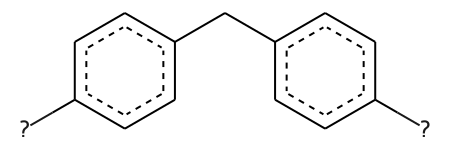

In [11]:
mol1

In [22]:
mcf_list = df_mcf["smarts"].tolist()
#mcf_list1 = mcf_list[0]
#mcf_list1

In [24]:
mols = [Chem.MolFromSmarts(m) for m in mcf_list]

In [25]:
mols

In [27]:
Chem.Draw.MolsToImage(mols, legends=None)

RDKit ERROR: [16:08:13] non-ring atom 1 marked aromatic


AtomKekulizeException: non-ring atom 1 marked aromatic

In [28]:
mcf_list

['[#6]=&!@[#6]-[#6]#[#7]',
 '[#6]=&!@[#6]-[#16](=[#8])=[#8]',
 '[#6]=&!@[#6&!H0]-&!@[#6](=[#8])-&!@[#7]',
 '[H]C([H])([#6])[F,Cl,Br,I]',
 '[#6]1-[#8]-[#6]-1',
 '[#6]-[#7]=[#6]=[#8]',
 '[#6&!H0]=[#8]',
 '[#6](=&!@[#7&!H0])-&!@[#6,#7,#8,#16]',
 '[#6]1-[#7]-[#6]-1',
 '[#6]~&!@[#7]~&!@[#7]~&!@[#6]',
 '[#7]=&!@[#7]',
 '[H][#6]-1=[#6]([H])-[#6]=[#6](-*)-[#8]-1',
 '[H][#6]-1=[#6]([H])-[#6]=[#6](-*)-[#16]-1',
 '[#17,#35,#53]-c(:*):[!#1!#6]:*',
 '[H][#7]([H])-[#6]-1=[#6]-[#6]=[#6]-[#6]=[#6]-1',
 '[#16]~[#16]',
 '[#7]~&!@[#7]~&!@[#7]',
 '[#7]-&!@[#6&!H0&!H1]-&!@[#7]',
 '[#6&!H0](-&!@[#8])-&!@[#8]',
 '[#35].[#35].[#35]',
 '[#17].[#17].[#17].[#17]',
 '[#9].[#9].[#9].[#9].[#9].[#9].[#9]']

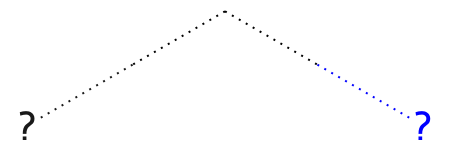

In [38]:
pattern = "[#6](=&!@[#7&!H0])-&!@[#6,#7,#8,#16]"
mol = Chem.MolFromSmarts(pattern)
mol